In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Plot settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [4]:
# File paths
DATA_PATH = '../data/raw/'

FLIGHTS_FILE = DATA_PATH + 'flights_2019.csv'
AIRPORTS_FILE = DATA_PATH + 'airports.csv'
AIRLINES_FILE = DATA_PATH + 'airlines.csv'

print("File paths defined!")

File paths defined!


In [5]:
import os

files = ['flights_2019.csv', 'airports.csv', 'airlines.csv']

print("FILE SIZES:")
print("-" * 40)
for file in files:
    filepath = DATA_PATH + file
    if os.path.exists(filepath):
        size_mb = os.path.getsize(filepath) / (1024 * 1024)
        print(f"{file}: {size_mb:.2f} MB")
    else:
        print(f"{file}: NOT FOUND!")

FILE SIZES:
----------------------------------------
flights_2019.csv: 1253.82 MB
airports.csv: 0.02 MB
airlines.csv: 0.00 MB


In [6]:
# Load airlines lookup table
airlines = pd.read_csv(AIRLINES_FILE)

print(f"Airlines shape: {airlines.shape}")
print(f"\nColumns: {airlines.columns.tolist()}")
print(f"\n{airlines}")

Airlines shape: (14, 2)

Columns: ['IATA_CODE', 'AIRLINE']

   IATA_CODE                       AIRLINE
0         UA         United Air Lines Inc.
1         AA        American Airlines Inc.
2         US               US Airways Inc.
3         F9        Frontier Airlines Inc.
4         B6               JetBlue Airways
5         OO         Skywest Airlines Inc.
6         AS          Alaska Airlines Inc.
7         NK              Spirit Air Lines
8         WN        Southwest Airlines Co.
9         DL          Delta Air Lines Inc.
10        EV   Atlantic Southeast Airlines
11        HA        Hawaiian Airlines Inc.
12        MQ  American Eagle Airlines Inc.
13        VX                Virgin America


In [7]:
# Load airports lookup table
airports = pd.read_csv(AIRPORTS_FILE)

print(f"Airports shape: {airports.shape}")
print(f"\nColumns: {airports.columns.tolist()}")
print(f"\nFirst 10 rows:")
airports.head(10)

Airports shape: (322, 7)

Columns: ['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE']

First 10 rows:


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65,-75.44
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41,-99.68
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04,-106.61
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.45,-98.42
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.54,-84.19
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25,-70.06
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61,-97.23
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.98,-124.11
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.46,-74.58
9,ADK,Adak Airport,Adak,AK,USA,51.88,-176.65


In [8]:
# Load main flights data
# This may take 1-2 minutes due to file size

print("Loading flights data... (this takes a minute)")

flights = pd.read_csv(FLIGHTS_FILE, low_memory=False)

print(f"\nFlights loaded!")
print(f"Shape: {flights.shape[0]:,} rows × {flights.shape[1]} columns")

Loading flights data... (this takes a minute)

Flights loaded!
Shape: 4,542,343 rows × 30 columns


In [9]:
# Preview the data
print("FIRST 5 ROWS:")
flights.head()

FIRST 5 ROWS:


,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,79247,7972,2006675,11744595,0.00,0.00,6,Douglas Municipal,35.22,-80.94,Chicago O'Hare International,0.00,0.00,0.00,95.00,4.25,0.24,0.27,0.22,0.26
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,67082,3655,2743323,3472966,0.00,0.00,15,Stapleton International,39.77,-104.88,El Paso International,0.00,0.00,0.00,71.00,11.41,0.15,0.12,0.24,0.20
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,25517,300,90547,1204766,0.00,0.00,3,Adams Field,34.73,-92.23,NONE,0.00,0.00,0.00,54.00,0.45,0.12,0.19,0.14,0.06
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,114119,3282,1023434,13382999,0.00,0.00,19,San Diego International Lindbergh Fl,32.73,-117.19,San Jose International,0.00,0.00,0.00,64.00,8.05,0.20,0.14,0.13,0.20
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,28267,6058,3103410,1204766,0.00,0.00,15,Chicago O'Hare International,41.98,-87.91,Cincinnati/Northern Kentucky International,0.01,0.00,0.00,94.00,10.51,0.20,0.19,0.20,0.11


In [10]:
# See all column names
print("ALL COLUMNS IN FLIGHTS DATA:")
print("-" * 40)
for i, col in enumerate(flights.columns, 1):
    print(f"{i:2}. {col}")

ALL COLUMNS IN FLIGHTS DATA:
----------------------------------------
 1. MONTH
 2. DAY_OF_WEEK
 3. DEP_DEL15
 4. DEP_TIME_BLK
 5. DISTANCE_GROUP
 6. SEGMENT_NUMBER
 7. CONCURRENT_FLIGHTS
 8. NUMBER_OF_SEATS
 9. CARRIER_NAME
10. AIRPORT_FLIGHTS_MONTH
11. AIRLINE_FLIGHTS_MONTH
12. AIRLINE_AIRPORT_FLIGHTS_MONTH
13. AVG_MONTHLY_PASS_AIRPORT
14. AVG_MONTHLY_PASS_AIRLINE
15. FLT_ATTENDANTS_PER_PASS
16. GROUND_SERV_PER_PASS
17. PLANE_AGE
18. DEPARTING_AIRPORT
19. LATITUDE
20. LONGITUDE
21. PREVIOUS_AIRPORT
22. PRCP
23. SNOW
24. SNWD
25. TMAX
26. AWND
27. CARRIER_HISTORICAL
28. DEP_AIRPORT_HIST
29. DAY_HISTORICAL
30. DEP_BLOCK_HIST


In [11]:
# Check data types and memory usage
print("DATA TYPES & MEMORY:")
print("-" * 40)
flights.info()

DATA TYPES & MEMORY:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4542343 entries, 0 to 4542342
Data columns (total 30 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MONTH                          int64  
 1   DAY_OF_WEEK                    int64  
 2   DEP_DEL15                      int64  
 3   DEP_TIME_BLK                   object 
 4   DISTANCE_GROUP                 int64  
 5   SEGMENT_NUMBER                 int64  
 6   CONCURRENT_FLIGHTS             int64  
 7   NUMBER_OF_SEATS                int64  
 8   CARRIER_NAME                   object 
 9   AIRPORT_FLIGHTS_MONTH          int64  
 10  AIRLINE_FLIGHTS_MONTH          int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       int64  
 13  AVG_MONTHLY_PASS_AIRLINE       int64  
 14  FLT_ATTENDANTS_PER_PASS        float64
 15  GROUND_SERV_PER_PASS           float64
 16  PLANE_AGE                   

In [12]:
# Basic statistics for numeric columns
print("BASIC STATISTICS:")
flights.describe()

BASIC STATISTICS:


,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
count,4542343.00,4542343.00,4542343.00,4542343.00,4542343.00,4542343.00,4542343.00,4542343.00,4542343.00,4542343.00,4542343.00,4542343.00,4542343.00,4542343.00,4542343.00,4542343.00,4542343.00,4542343.00,4542343.00,4542343.00,4542343.00,4542343.00,4542343.00,4542343.00,4542343.00,4542343.00
mean,6.61,3.94,0.19,3.82,3.05,27.84,133.76,12689.24,62961.92,3460.36,1589212.78,7815003.09,0.00,0.00,11.53,36.71,-94.26,0.10,0.03,0.09,71.47,8.34,0.19,0.19,0.19,0.19
std,3.40,2.00,0.39,2.38,1.76,21.51,46.47,8841.53,34379.31,4253.08,1124084.33,5046719.49,0.00,0.00,6.94,5.50,17.91,0.34,0.32,0.73,18.35,3.61,0.05,0.04,0.04,0.08
min,1.00,1.00,0.00,1.00,1.00,1.00,44.00,1100.00,5582.00,1.00,70476.00,473794.00,0.00,0.00,0.00,18.44,-159.35,0.00,0.00,0.00,-10.00,0.00,0.06,0.04,0.10,0.06
25%,4.00,2.00,0.00,2.00,2.00,11.00,90.00,5345.00,25034.00,655.00,673221.00,2688839.00,0.00,0.00,5.00,33.44,-106.38,0.00,0.00,0.00,59.00,5.82,0.15,0.17,0.16,0.13
50%,7.00,4.00,0.00,3.00,3.00,23.00,143.00,11562.00,70878.00,2251.00,1486066.00,8501631.00,0.00,0.00,12.00,37.51,-87.91,0.00,0.00,0.00,74.00,7.83,0.19,0.19,0.19,0.19
75%,10.00,6.00,0.00,5.00,4.00,39.00,172.00,17615.00,86312.00,4806.00,2006675.00,12460183.00,0.00,0.00,17.00,40.78,-80.94,0.02,0.00,0.00,86.00,10.29,0.22,0.20,0.22,0.24
max,12.00,7.00,1.00,11.00,15.00,109.00,337.00,35256.00,117728.00,21837.00,4365661.00,13382999.00,0.00,0.00,32.00,61.17,-66.00,11.63,17.20,25.20,115.00,33.78,0.35,0.35,0.27,0.39


In [14]:
# Missing values analysis
missing = flights.isnull().sum()
missing_pct = (missing / len(flights)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).sort_values('Missing %', ascending=False)

print("MISSING VALUES:")
print("-" * 40)
missing_df[missing_df['Missing Count'] > 0]

MISSING VALUES:
----------------------------------------


,Missing Count,Missing %


In [17]:
# See all column names in your flights data
print("ALL COLUMNS IN YOUR DATASET:")
print("-" * 40)
for col in flights.columns:
    print(col)

ALL COLUMNS IN YOUR DATASET:
----------------------------------------
MONTH
DAY_OF_WEEK
DEP_DEL15
DEP_TIME_BLK
DISTANCE_GROUP
SEGMENT_NUMBER
CONCURRENT_FLIGHTS
NUMBER_OF_SEATS
CARRIER_NAME
AIRPORT_FLIGHTS_MONTH
AIRLINE_FLIGHTS_MONTH
AIRLINE_AIRPORT_FLIGHTS_MONTH
AVG_MONTHLY_PASS_AIRPORT
AVG_MONTHLY_PASS_AIRLINE
FLT_ATTENDANTS_PER_PASS
GROUND_SERV_PER_PASS
PLANE_AGE
DEPARTING_AIRPORT
LATITUDE
LONGITUDE
PREVIOUS_AIRPORT
PRCP
SNOW
SNWD
TMAX
AWND
CARRIER_HISTORICAL
DEP_AIRPORT_HIST
DAY_HISTORICAL
DEP_BLOCK_HIST


In [18]:
# Check total columns and see first rows
print(f"Total columns: {len(flights.columns)}")
print(f"Total rows: {len(flights):,}")
print("\n" + "="*50)
print("FIRST 5 ROWS:")
flights.head()

Total columns: 30
Total rows: 4,542,343

FIRST 5 ROWS:


,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,79247,7972,2006675,11744595,0.00,0.00,6,Douglas Municipal,35.22,-80.94,Chicago O'Hare International,0.00,0.00,0.00,95.00,4.25,0.24,0.27,0.22,0.26
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,67082,3655,2743323,3472966,0.00,0.00,15,Stapleton International,39.77,-104.88,El Paso International,0.00,0.00,0.00,71.00,11.41,0.15,0.12,0.24,0.20
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,25517,300,90547,1204766,0.00,0.00,3,Adams Field,34.73,-92.23,NONE,0.00,0.00,0.00,54.00,0.45,0.12,0.19,0.14,0.06
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,114119,3282,1023434,13382999,0.00,0.00,19,San Diego International Lindbergh Fl,32.73,-117.19,San Jose International,0.00,0.00,0.00,64.00,8.05,0.20,0.14,0.13,0.20
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,28267,6058,3103410,1204766,0.00,0.00,15,Chicago O'Hare International,41.98,-87.91,Cincinnati/Northern Kentucky International,0.01,0.00,0.00,94.00,10.51,0.20,0.19,0.20,0.11


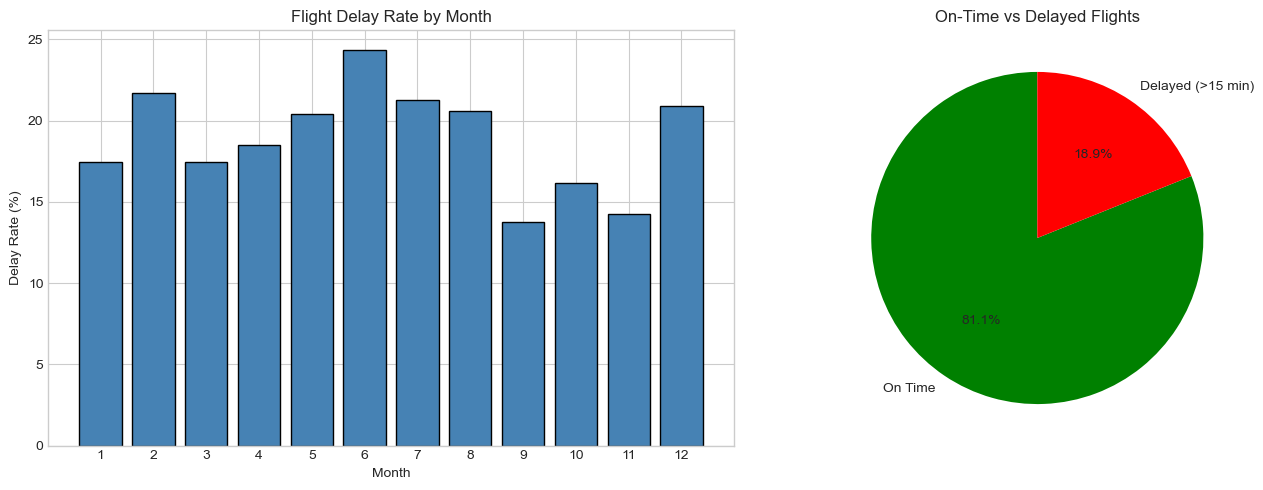


Total flights: 4,542,343
Delayed flights: 859,158 (18.9%)
On-time flights: 3,683,185 (81.1%)


In [19]:
# Quick visualization: Delay distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Delays by Month
monthly_delays = flights.groupby('MONTH')['DEP_DEL15'].mean() * 100
axes[0].bar(monthly_delays.index, monthly_delays.values, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Delay Rate (%)')
axes[0].set_title('Flight Delay Rate by Month')
axes[0].set_xticks(range(1, 13))

# Plot 2: Delayed vs On-time flights
delay_counts = flights['DEP_DEL15'].value_counts()
axes[1].pie(delay_counts, labels=['On Time', 'Delayed (>15 min)'], 
            autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
axes[1].set_title('On-Time vs Delayed Flights')

plt.tight_layout()
plt.show()

# Print summary
total = len(flights)
delayed = flights['DEP_DEL15'].sum()
print(f"\nTotal flights: {total:,}")
print(f"Delayed flights: {delayed:,} ({delayed/total*100:.1f}%)")
print(f"On-time flights: {total-delayed:,} ({(total-delayed)/total*100:.1f}%)")

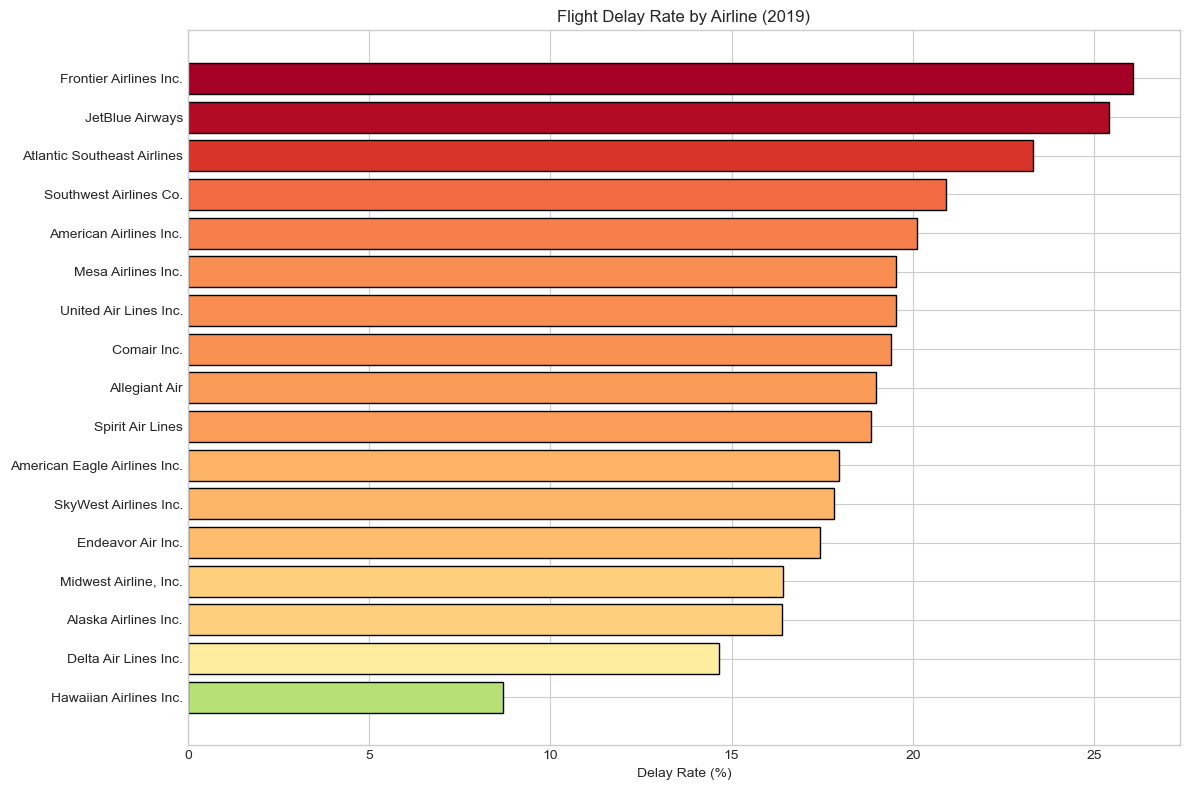


🔴 TOP 5 MOST DELAYED AIRLINES:
                             Delay_Rate  Total_Flights
CARRIER_NAME                                          
American Airlines Inc.            20.10         632771
Southwest Airlines Co.            20.90         907076
Atlantic Southeast Airlines       23.31          69161
JetBlue Airways                   25.40         188402
Frontier Airlines Inc.            26.06          84970

🟢 TOP 5 MOST PUNCTUAL AIRLINES:
                        Delay_Rate  Total_Flights
CARRIER_NAME                                     
Hawaiian Airlines Inc.        8.69          52444
Delta Air Lines Inc.         14.64         657062
Alaska Airlines Inc.         16.40         167595
Midwest Airline, Inc.        16.43         210298
Endeavor Air Inc.            17.43         142498


In [20]:
# Delay rate by airline
carrier_delays = flights.groupby('CARRIER_NAME')['DEP_DEL15'].agg(['mean', 'count'])
carrier_delays.columns = ['Delay_Rate', 'Total_Flights']
carrier_delays['Delay_Rate'] = carrier_delays['Delay_Rate'] * 100
carrier_delays = carrier_delays.sort_values('Delay_Rate', ascending=True)

# Plot
plt.figure(figsize=(12, 8))
colors = plt.cm.RdYlGn_r(carrier_delays['Delay_Rate'] / carrier_delays['Delay_Rate'].max())
plt.barh(carrier_delays.index, carrier_delays['Delay_Rate'], color=colors, edgecolor='black')
plt.xlabel('Delay Rate (%)')
plt.title('Flight Delay Rate by Airline (2019)')
plt.tight_layout()
plt.show()

# Print top 5 worst and best
print("\n🔴 TOP 5 MOST DELAYED AIRLINES:")
print(carrier_delays.tail(5)[['Delay_Rate', 'Total_Flights']])
print("\n🟢 TOP 5 MOST PUNCTUAL AIRLINES:")
print(carrier_delays.head(5)[['Delay_Rate', 'Total_Flights']])

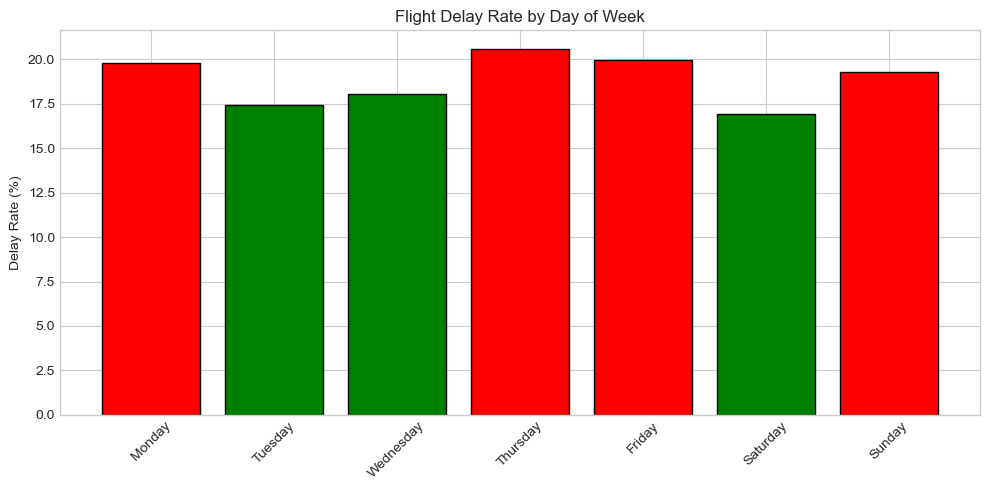


Delay Rate by Day:
  Monday: 19.8%
  Tuesday: 17.4%
  Wednesday: 18.0%
  Thursday: 20.6%
  Friday: 20.0%
  Saturday: 16.9%
  Sunday: 19.3%


In [21]:
# Delay by day of week
day_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
             4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

daily_delays = flights.groupby('DAY_OF_WEEK')['DEP_DEL15'].mean() * 100
daily_delays.index = daily_delays.index.map(day_names)

plt.figure(figsize=(10, 5))
colors = ['red' if x > 19 else 'green' for x in daily_delays.values]
plt.bar(daily_delays.index, daily_delays.values, color=colors, edgecolor='black')
plt.ylabel('Delay Rate (%)')
plt.title('Flight Delay Rate by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nDelay Rate by Day:")
for day, rate in daily_delays.items():
    print(f"  {day}: {rate:.1f}%")

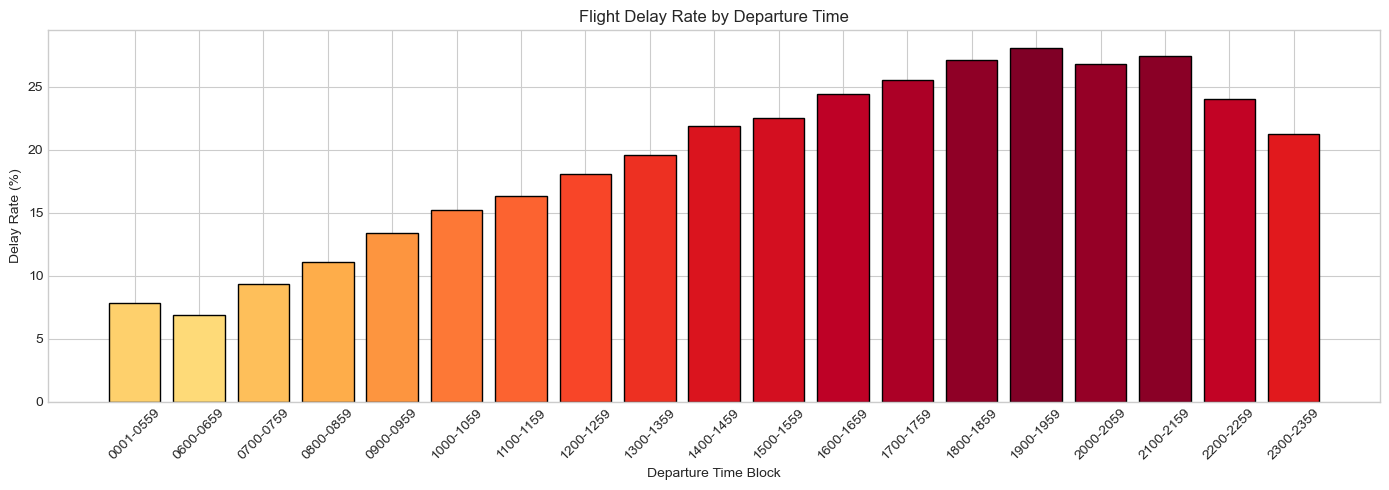


⏰ BEST TIME TO FLY (Lowest Delays):
   0600-0659 → 6.9% delay rate

⚠️ WORST TIME TO FLY (Highest Delays):
   1900-1959 → 28.1% delay rate


In [22]:
# Delay by departure time block
time_delays = flights.groupby('DEP_TIME_BLK')['DEP_DEL15'].mean() * 100
time_delays = time_delays.sort_index()

plt.figure(figsize=(14, 5))
colors = plt.cm.YlOrRd(time_delays.values / time_delays.max())
plt.bar(time_delays.index, time_delays.values, color=colors, edgecolor='black')
plt.xlabel('Departure Time Block')
plt.ylabel('Delay Rate (%)')
plt.title('Flight Delay Rate by Departure Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n⏰ BEST TIME TO FLY (Lowest Delays):")
print(f"   {time_delays.idxmin()} → {time_delays.min():.1f}% delay rate")
print("\n⚠️ WORST TIME TO FLY (Highest Delays):")
print(f"   {time_delays.idxmax()} → {time_delays.max():.1f}% delay rate")

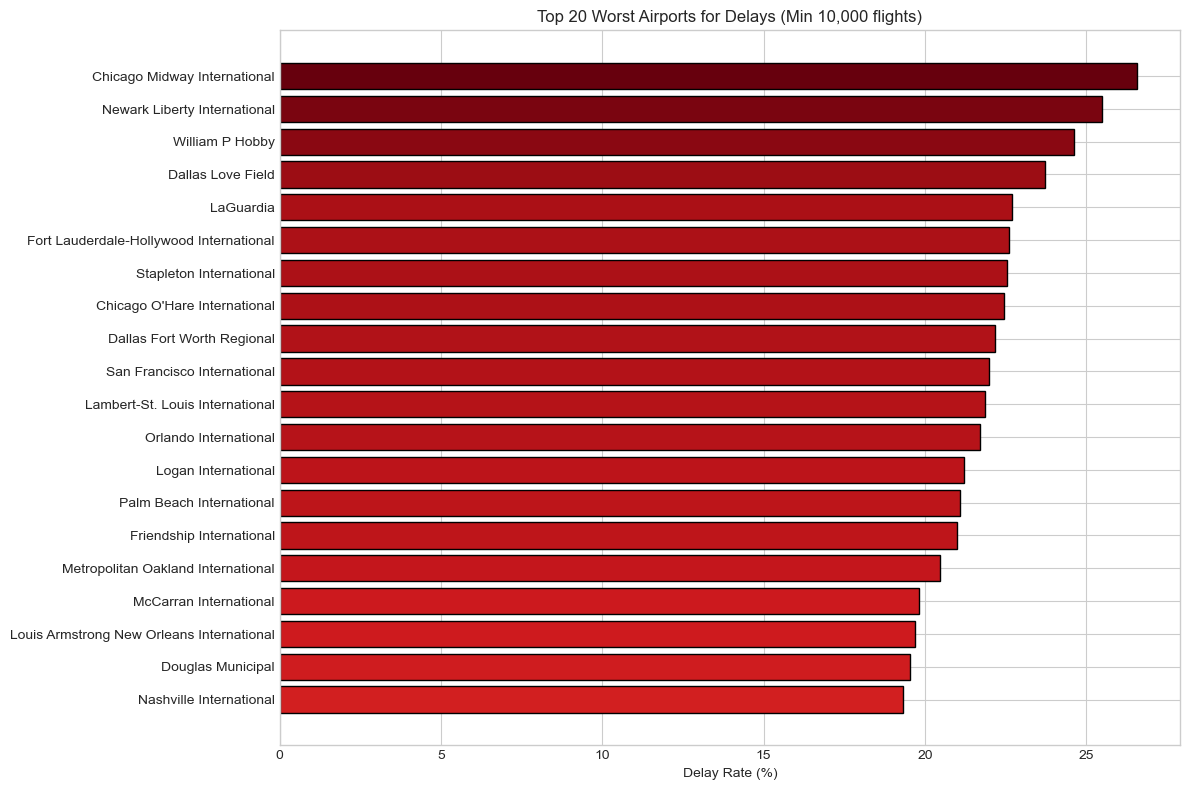

In [23]:
# Delay rate by airport
airport_delays = flights.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].agg(['mean', 'count'])
airport_delays.columns = ['Delay_Rate', 'Total_Flights']
airport_delays['Delay_Rate'] = airport_delays['Delay_Rate'] * 100

# Filter airports with at least 10,000 flights (significant volume)
major_airports = airport_delays[airport_delays['Total_Flights'] >= 10000]
worst_airports = major_airports.sort_values('Delay_Rate', ascending=False).head(20)

plt.figure(figsize=(12, 8))
colors = plt.cm.Reds(worst_airports['Delay_Rate'] / worst_airports['Delay_Rate'].max())
plt.barh(worst_airports.index, worst_airports['Delay_Rate'], color=colors, edgecolor='black')
plt.xlabel('Delay Rate (%)')
plt.title('Top 20 Worst Airports for Delays (Min 10,000 flights)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

/var/folders/vc/5pm4h46d0b95xndmztjnr2fc0000gn/T/ipykernel_4274/153007580.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precip_delays = flights.groupby(pd.cut(flights['PRCP'], bins=5))['DEP_DEL15'].mean() * 100
/var/folders/vc/5pm4h46d0b95xndmztjnr2fc0000gn/T/ipykernel_4274/153007580.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  snow_delays = flights.groupby(pd.cut(flights['SNOW'], bins=5))['DEP_DEL15'].mean() * 100
/var/folders/vc/5pm4h46d0b95xndmztjnr2fc0000gn/T/ipykernel_4274/153007580.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ver

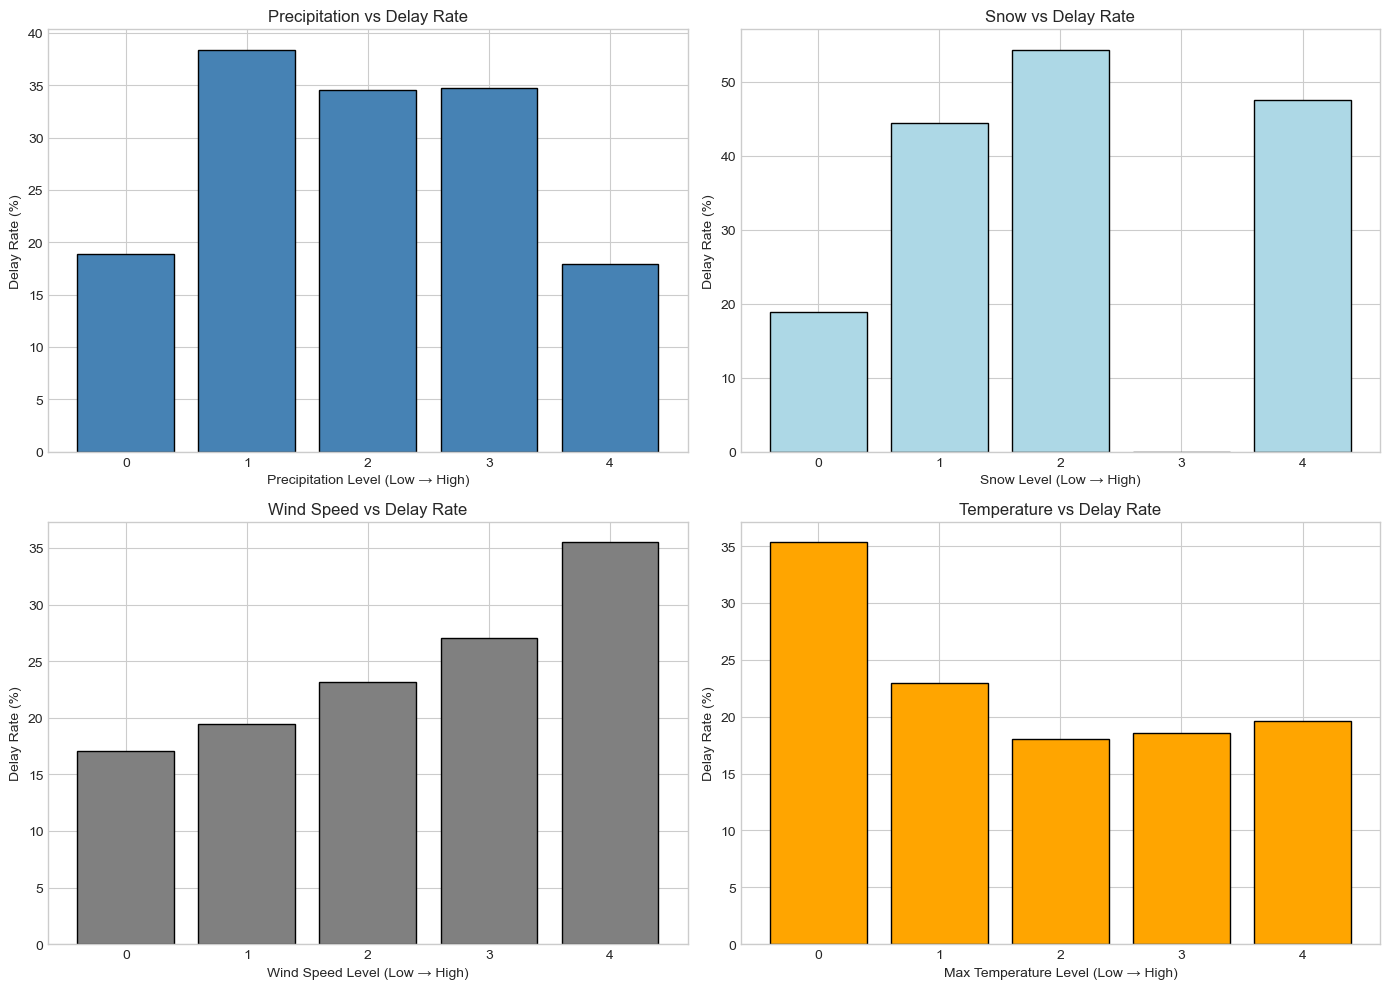


🌧️ KEY INSIGHT: Weather conditions significantly impact flight delays!


In [24]:
# Weather impact analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Precipitation vs Delays
precip_delays = flights.groupby(pd.cut(flights['PRCP'], bins=5))['DEP_DEL15'].mean() * 100
axes[0, 0].bar(range(len(precip_delays)), precip_delays.values, color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('Precipitation Level (Low → High)')
axes[0, 0].set_ylabel('Delay Rate (%)')
axes[0, 0].set_title('Precipitation vs Delay Rate')

# 2. Snow vs Delays
snow_delays = flights.groupby(pd.cut(flights['SNOW'], bins=5))['DEP_DEL15'].mean() * 100
axes[0, 1].bar(range(len(snow_delays)), snow_delays.values, color='lightblue', edgecolor='black')
axes[0, 1].set_xlabel('Snow Level (Low → High)')
axes[0, 1].set_ylabel('Delay Rate (%)')
axes[0, 1].set_title('Snow vs Delay Rate')

# 3. Wind vs Delays
wind_delays = flights.groupby(pd.cut(flights['AWND'], bins=5))['DEP_DEL15'].mean() * 100
axes[1, 0].bar(range(len(wind_delays)), wind_delays.values, color='gray', edgecolor='black')
axes[1, 0].set_xlabel('Wind Speed Level (Low → High)')
axes[1, 0].set_ylabel('Delay Rate (%)')
axes[1, 0].set_title('Wind Speed vs Delay Rate')

# 4. Temperature vs Delays
temp_delays = flights.groupby(pd.cut(flights['TMAX'], bins=5))['DEP_DEL15'].mean() * 100
axes[1, 1].bar(range(len(temp_delays)), temp_delays.values, color='orange', edgecolor='black')
axes[1, 1].set_xlabel('Max Temperature Level (Low → High)')
axes[1, 1].set_ylabel('Delay Rate (%)')
axes[1, 1].set_title('Temperature vs Delay Rate')

plt.tight_layout()
plt.show()

print("\n🌧️ KEY INSIGHT: Weather conditions significantly impact flight delays!")

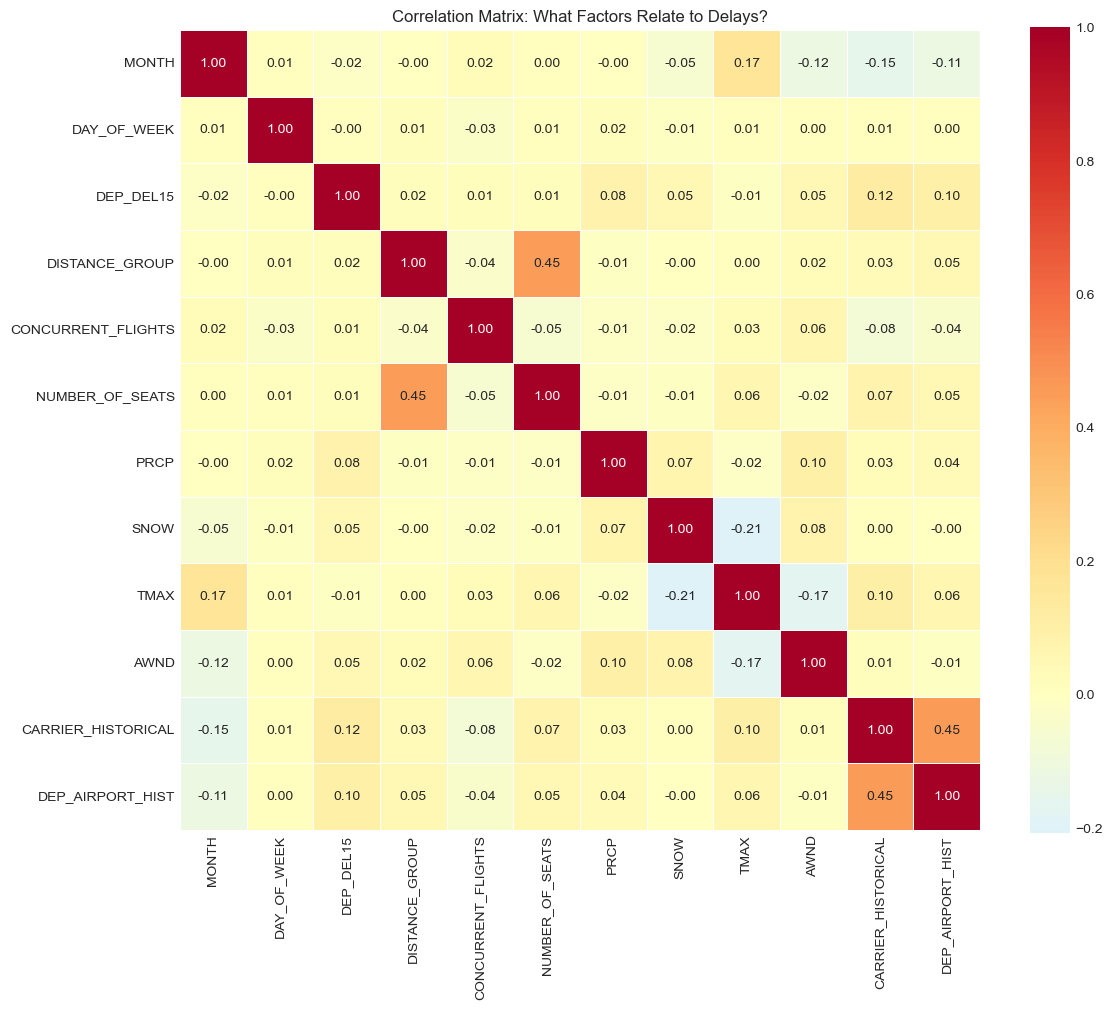


📊 FACTORS MOST CORRELATED WITH DELAYS:
---------------------------------------------
  CARRIER_HISTORICAL        : +0.121 ↑ More delays
  DEP_AIRPORT_HIST          : +0.100 ↑ More delays
  PRCP                      : +0.080 ↑ More delays
  AWND                      : +0.051 ↑ More delays
  SNOW                      : +0.050 ↑ More delays
  DISTANCE_GROUP            : +0.016 ↑ More delays
  NUMBER_OF_SEATS           : +0.012 ↑ More delays
  CONCURRENT_FLIGHTS        : +0.009 ↑ More delays
  DAY_OF_WEEK               : -0.000 ↓ Fewer delays
  TMAX                      : -0.009 ↓ Fewer delays
  MONTH                     : -0.019 ↓ Fewer delays


In [25]:
# Select numeric columns for correlation
numeric_cols = ['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DISTANCE_GROUP', 
                'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'PRCP', 'SNOW', 
                'TMAX', 'AWND', 'CARRIER_HISTORICAL', 'DEP_AIRPORT_HIST']

correlation_matrix = flights[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix: What Factors Relate to Delays?')
plt.tight_layout()
plt.show()

# Top correlations with delay
delay_correlations = correlation_matrix['DEP_DEL15'].drop('DEP_DEL15').sort_values(ascending=False)
print("\n📊 FACTORS MOST CORRELATED WITH DELAYS:")
print("-" * 45)
for feature, corr in delay_correlations.items():
    direction = "↑ More delays" if corr > 0 else "↓ Fewer delays"
    print(f"  {feature:25} : {corr:+.3f} {direction}")

Mapping 88 major airports...


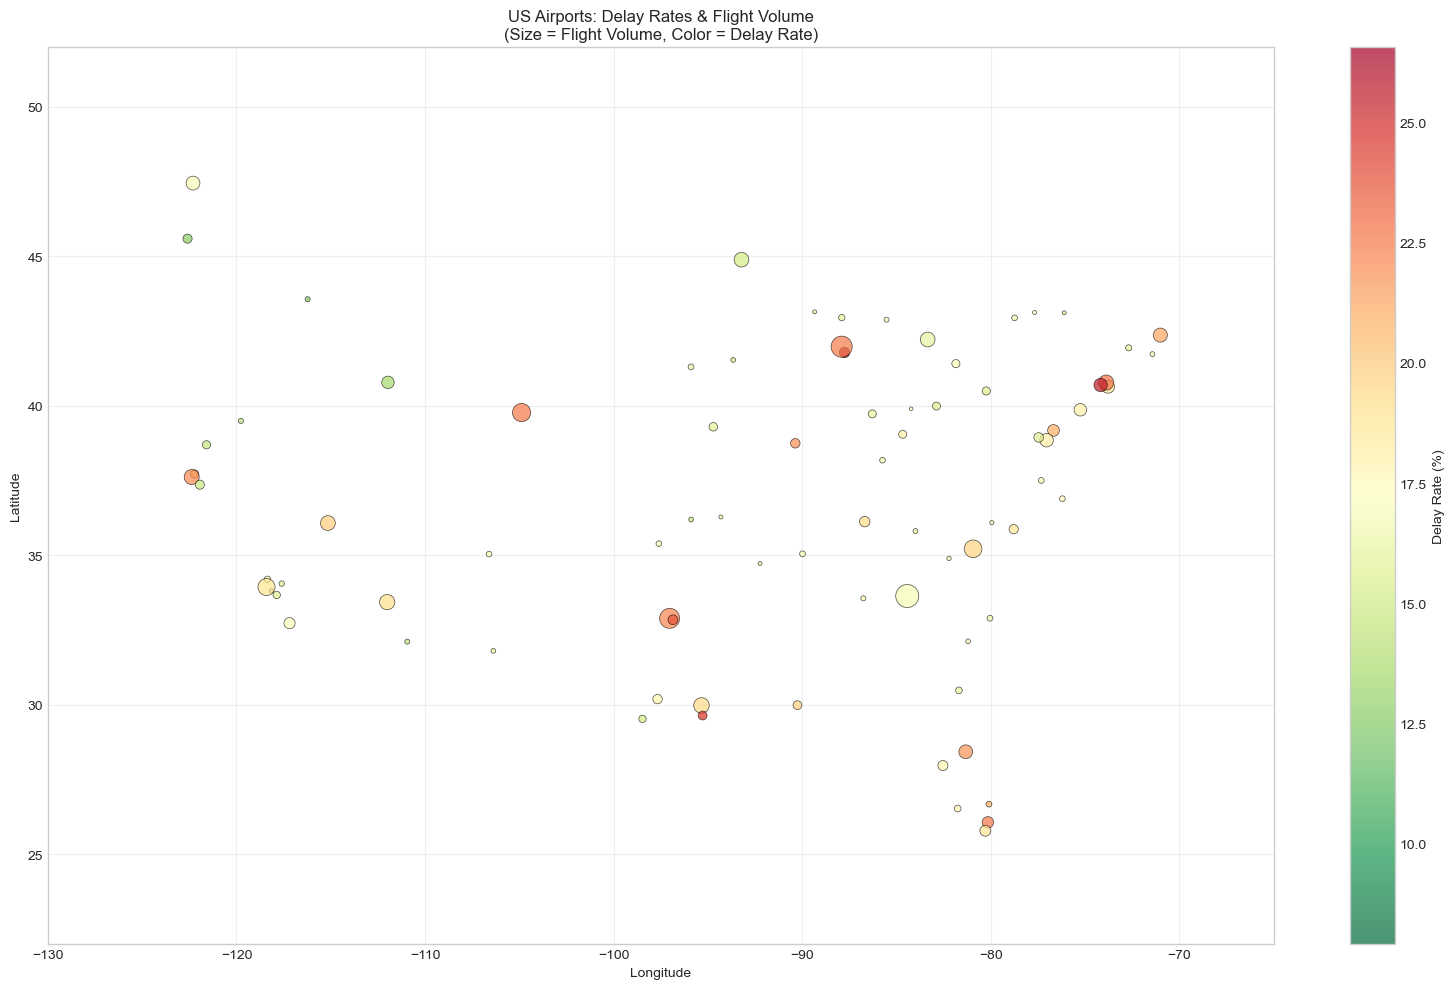


✈️ TOP 10 BUSIEST AIRPORTS:
--------------------------------------------------
  Atlanta Municipal : 275,230 flights | 16.8% delays
  Chicago O'Hare International : 230,460 flights | 22.5% delays
  Dallas Fort Worth Regional : 207,742 flights | 22.2% delays
  Stapleton International : 173,046 flights | 22.6% delays
  Douglas Municipal : 162,162 flights | 19.5% delays
  Los Angeles International : 151,915 flights | 18.9% delays
  Houston Intercontinental : 124,083 flights | 19.3% delays
  Phoenix Sky Harbor International : 120,813 flights | 19.1% delays
  LaGuardia : 117,150 flights | 22.7% delays
  San Francisco International : 116,948 flights | 22.0% delays


In [26]:
# Get airport delay rates with coordinates
airport_stats = flights.groupby('DEPARTING_AIRPORT').agg({
    'DEP_DEL15': 'mean',
    'LATITUDE': 'first',
    'LONGITUDE': 'first',
    'MONTH': 'count'  # Total flights
}).reset_index()

airport_stats.columns = ['Airport', 'Delay_Rate', 'Latitude', 'Longitude', 'Total_Flights']
airport_stats['Delay_Rate'] = airport_stats['Delay_Rate'] * 100

# Filter to major airports (at least 5000 flights)
major_airports = airport_stats[airport_stats['Total_Flights'] >= 5000].copy()

print(f"Mapping {len(major_airports)} major airports...")

# Create scatter map
plt.figure(figsize=(16, 10))

# Plot US outline (approximate)
plt.scatter(major_airports['Longitude'], major_airports['Latitude'], 
            c=major_airports['Delay_Rate'], 
            s=major_airports['Total_Flights'] / 1000,  # Size by flight volume
            cmap='RdYlGn_r', 
            alpha=0.7,
            edgecolors='black',
            linewidths=0.5)

plt.colorbar(label='Delay Rate (%)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('US Airports: Delay Rates & Flight Volume\n(Size = Flight Volume, Color = Delay Rate)')
plt.xlim(-130, -65)
plt.ylim(22, 52)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Top 10 busiest airports
print("\n✈️ TOP 10 BUSIEST AIRPORTS:")
print("-" * 50)
busiest = major_airports.nlargest(10, 'Total_Flights')
for _, row in busiest.iterrows():
    print(f"  {row['Airport']:5} : {row['Total_Flights']:>7,} flights | {row['Delay_Rate']:.1f}% delays")

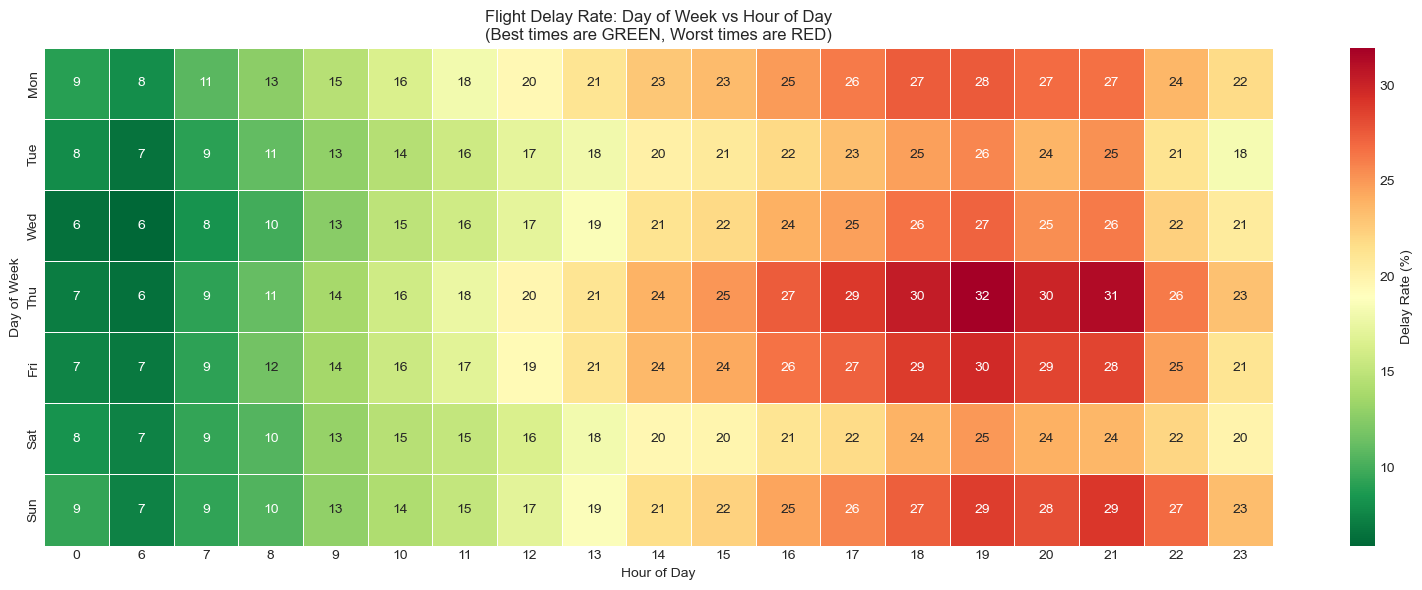


⏰ BEST TIME TO FLY: Early morning (5-7 AM) on Tuesday/Wednesday/Saturday
⚠️ WORST TIME TO FLY: Evening (6-9 PM) on Thursday/Friday


In [27]:
# Create hour from time block
def get_hour(time_blk):
    try:
        return int(time_blk.split('-')[0][:2])
    except:
        return None

flights['HOUR'] = flights['DEP_TIME_BLK'].apply(get_hour)

# Create pivot table: Day of Week vs Hour
day_names = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}
flights['DAY_NAME'] = flights['DAY_OF_WEEK'].map(day_names)

heatmap_data = flights.pivot_table(
    values='DEP_DEL15', 
    index='DAY_NAME', 
    columns='HOUR', 
    aggfunc='mean'
) * 100

# Reorder days
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
heatmap_data = heatmap_data.reindex(day_order)

plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_data, cmap='RdYlGn_r', annot=True, fmt='.0f', 
            linewidths=0.5, cbar_kws={'label': 'Delay Rate (%)'})
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Flight Delay Rate: Day of Week vs Hour of Day\n(Best times are GREEN, Worst times are RED)')
plt.tight_layout()
plt.show()

print("\n⏰ BEST TIME TO FLY: Early morning (5-7 AM) on Tuesday/Wednesday/Saturday")
print("⚠️ WORST TIME TO FLY: Evening (6-9 PM) on Thursday/Friday")

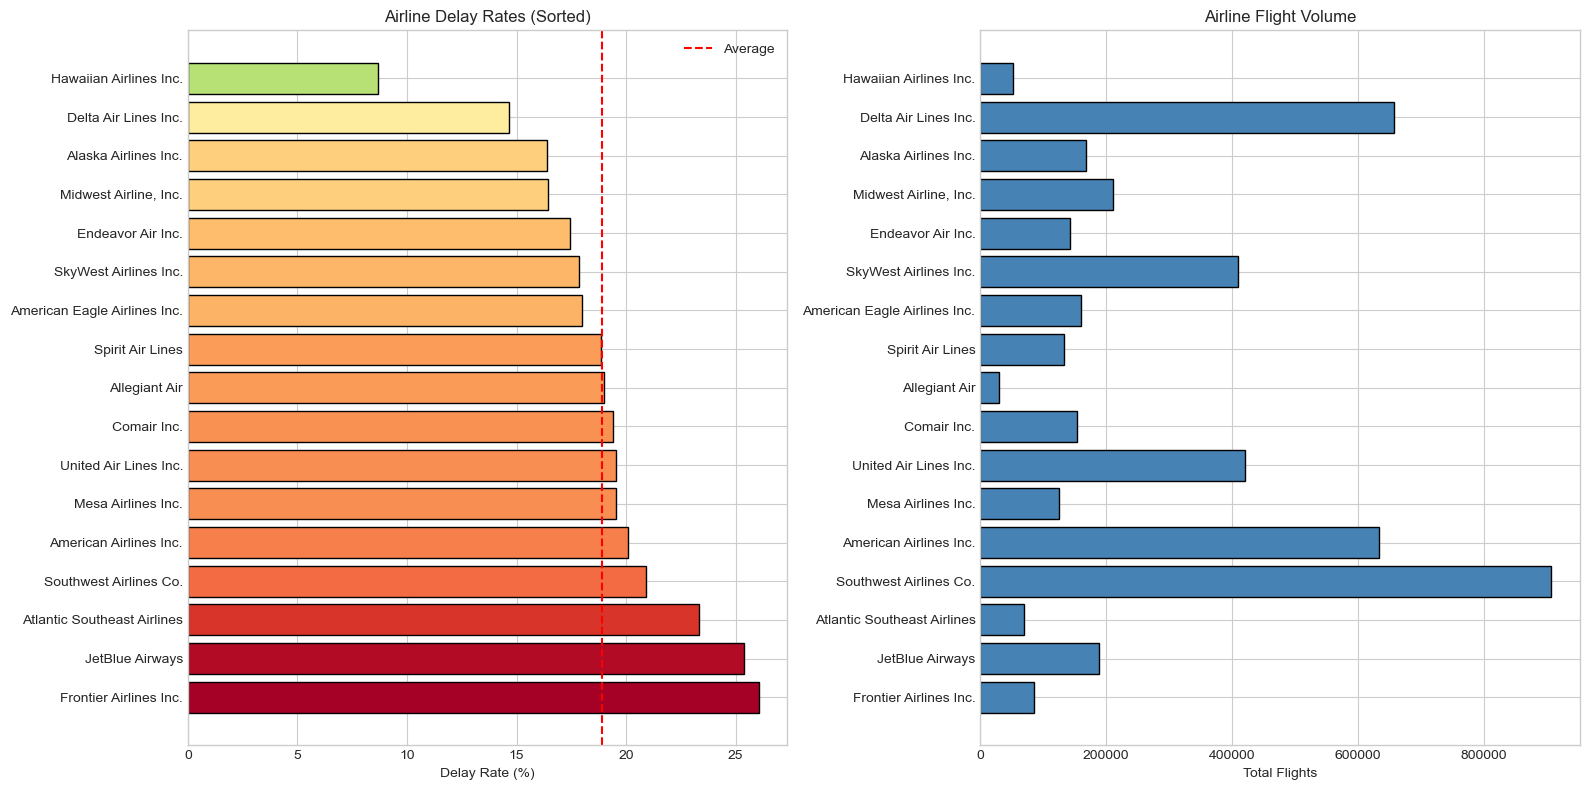


📊 AIRLINE PERFORMANCE SUMMARY:
----------------------------------------------------------------------
Airline                                Delay %      Flights    Delayed
----------------------------------------------------------------------
Frontier Airlines Inc.                   26.1%      84,970     22,147
JetBlue Airways                          25.4%     188,402     47,849
Atlantic Southeast Airlines              23.3%      69,161     16,120
Southwest Airlines Co.                   20.9%     907,076    189,617
American Airlines Inc.                   20.1%     632,771    127,209
Mesa Airlines Inc.                       19.5%     124,171     24,269
United Air Lines Inc.                    19.5%     420,624     82,141
Comair Inc.                              19.4%     153,365     29,751
Allegiant Air                            19.0%      29,712      5,638
Spirit Air Lines                         18.9%     132,678     25,017
American Eagle Airlines Inc.             18.0%     160,

In [28]:
# Detailed airline analysis
airline_stats = flights.groupby('CARRIER_NAME').agg({
    'DEP_DEL15': ['mean', 'sum', 'count'],
    'CONCURRENT_FLIGHTS': 'mean'
}).reset_index()

airline_stats.columns = ['Airline', 'Delay_Rate', 'Total_Delays', 'Total_Flights', 'Avg_Concurrent']
airline_stats['Delay_Rate'] = airline_stats['Delay_Rate'] * 100
airline_stats = airline_stats.sort_values('Delay_Rate', ascending=False)

# Create figure with 2 plots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Delay Rate
colors = plt.cm.RdYlGn_r(airline_stats['Delay_Rate'] / airline_stats['Delay_Rate'].max())
axes[0].barh(airline_stats['Airline'], airline_stats['Delay_Rate'], color=colors, edgecolor='black')
axes[0].set_xlabel('Delay Rate (%)')
axes[0].set_title('Airline Delay Rates (Sorted)')
axes[0].axvline(x=airline_stats['Delay_Rate'].mean(), color='red', linestyle='--', label='Average')
axes[0].legend()

# Plot 2: Total Flights
axes[1].barh(airline_stats['Airline'], airline_stats['Total_Flights'], color='steelblue', edgecolor='black')
axes[1].set_xlabel('Total Flights')
axes[1].set_title('Airline Flight Volume')

plt.tight_layout()
plt.show()

# Summary table
print("\n📊 AIRLINE PERFORMANCE SUMMARY:")
print("-" * 70)
print(f"{'Airline':<35} {'Delay %':>10} {'Flights':>12} {'Delayed':>10}")
print("-" * 70)
for _, row in airline_stats.iterrows():
    print(f"{row['Airline']:<35} {row['Delay_Rate']:>9.1f}% {row['Total_Flights']:>11,} {row['Total_Delays']:>10,}")

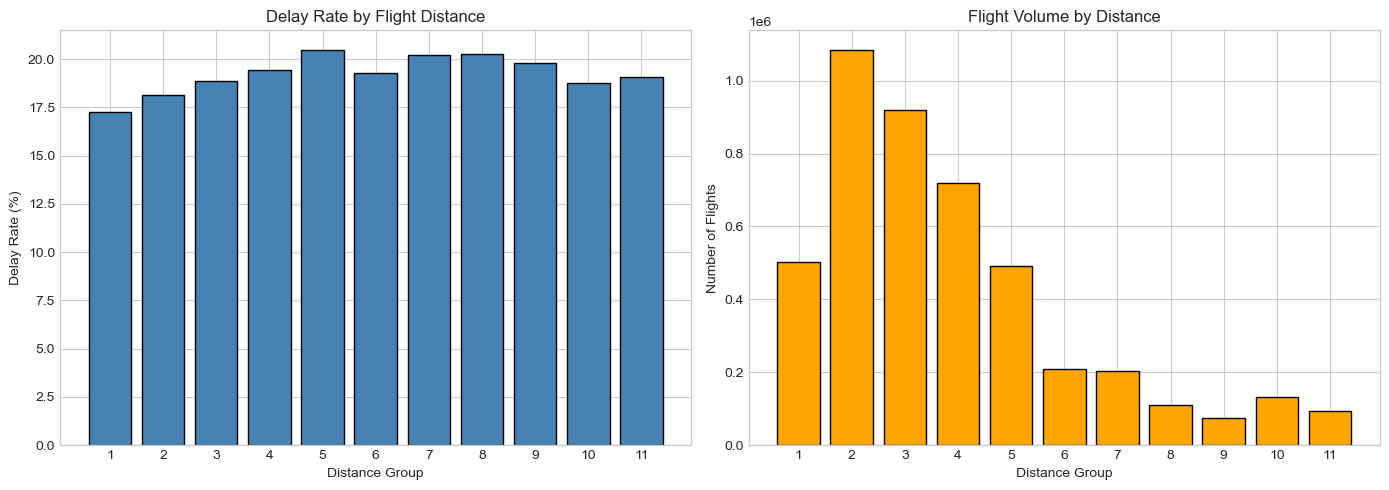


📏 DISTANCE ANALYSIS:
--------------------------------------------------
  0-250 mi       : 17.3% delays (503,019 flights)
  250-500 mi     : 18.2% delays (1,083,722 flights)
  500-750 mi     : 18.9% delays (920,595 flights)
  750-1000 mi    : 19.4% delays (720,302 flights)
  1000-1250 mi   : 20.5% delays (492,358 flights)
  1250-1500 mi   : 19.3% delays (209,943 flights)
  1500-1750 mi   : 20.2% delays (202,436 flights)
  1750-2000 mi   : 20.2% delays (109,082 flights)
  2000-2250 mi   : 19.8% delays (75,032 flights)
  2250-2500 mi   : 18.8% delays (131,528 flights)
  2500+ mi       : 19.1% delays (94,326 flights)


In [29]:
# Distance group analysis
distance_labels = {
    1: '0-250 mi', 2: '250-500 mi', 3: '500-750 mi', 4: '750-1000 mi',
    5: '1000-1250 mi', 6: '1250-1500 mi', 7: '1500-1750 mi', 8: '1750-2000 mi',
    9: '2000-2250 mi', 10: '2250-2500 mi', 11: '2500+ mi'
}

distance_delays = flights.groupby('DISTANCE_GROUP').agg({
    'DEP_DEL15': 'mean',
    'MONTH': 'count'
}).reset_index()

distance_delays.columns = ['Distance_Group', 'Delay_Rate', 'Total_Flights']
distance_delays['Delay_Rate'] = distance_delays['Delay_Rate'] * 100
distance_delays['Label'] = distance_delays['Distance_Group'].map(distance_labels)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Delay rate by distance
axes[0].bar(distance_delays['Distance_Group'], distance_delays['Delay_Rate'], 
            color='steelblue', edgecolor='black')
axes[0].set_xlabel('Distance Group')
axes[0].set_ylabel('Delay Rate (%)')
axes[0].set_title('Delay Rate by Flight Distance')
axes[0].set_xticks(distance_delays['Distance_Group'])

# Plot 2: Flight volume by distance
axes[1].bar(distance_delays['Distance_Group'], distance_delays['Total_Flights'], 
            color='orange', edgecolor='black')
axes[1].set_xlabel('Distance Group')
axes[1].set_ylabel('Number of Flights')
axes[1].set_title('Flight Volume by Distance')
axes[1].set_xticks(distance_delays['Distance_Group'])

plt.tight_layout()
plt.show()

print("\n📏 DISTANCE ANALYSIS:")
print("-" * 50)
for _, row in distance_delays.iterrows():
    label = distance_labels.get(row['Distance_Group'], f"Group {row['Distance_Group']}")
    print(f"  {label:<15}: {row['Delay_Rate']:.1f}% delays ({row['Total_Flights']:,} flights)")

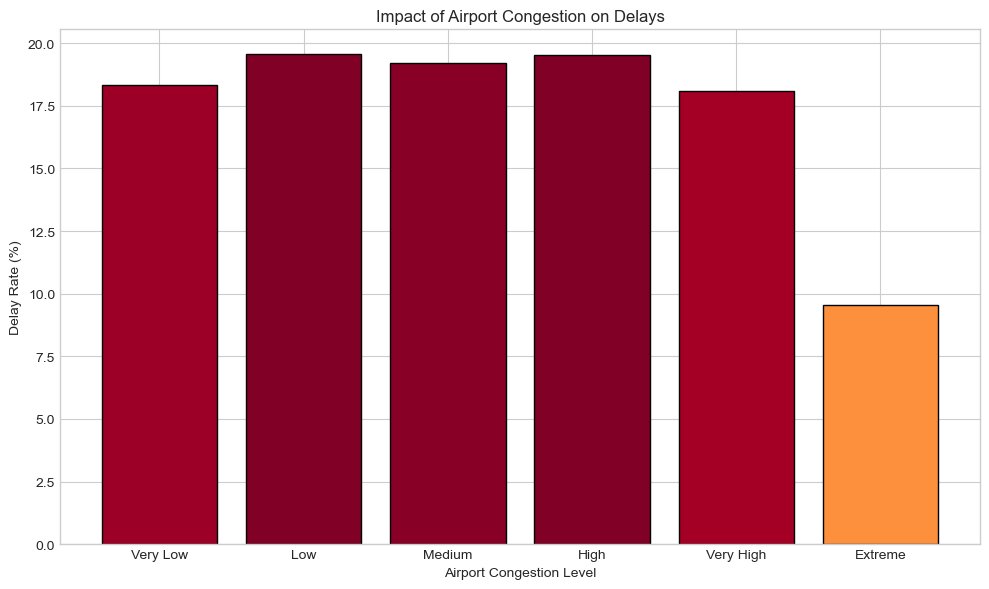


🚦 CONGESTION IMPACT:
--------------------------------------------------
  Very Low    : 18.3% delays (2,087,276.0 flights)
  Low         : 19.6% delays (1,388,229.0 flights)
  Medium      : 19.2% delays (579,178.0 flights)
  High        : 19.5% delays (366,407.0 flights)
  Very High   : 18.1% delays (117,402.0 flights)
  Extreme     : 9.6% delays (3,851.0 flights)

💡 INSIGHT: Higher airport congestion = More delays!


In [30]:
# Concurrent flights impact
flights['Congestion_Level'] = pd.cut(flights['CONCURRENT_FLIGHTS'], 
                                      bins=[0, 20, 40, 60, 80, 100, 200],
                                      labels=['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extreme'])

congestion_delays = flights.groupby('Congestion_Level', observed=True)['DEP_DEL15'].agg(['mean', 'count'])
congestion_delays.columns = ['Delay_Rate', 'Total_Flights']
congestion_delays['Delay_Rate'] = congestion_delays['Delay_Rate'] * 100

plt.figure(figsize=(10, 6))
colors = plt.cm.YlOrRd(congestion_delays['Delay_Rate'] / congestion_delays['Delay_Rate'].max())
plt.bar(congestion_delays.index.astype(str), congestion_delays['Delay_Rate'], color=colors, edgecolor='black')
plt.xlabel('Airport Congestion Level')
plt.ylabel('Delay Rate (%)')
plt.title('Impact of Airport Congestion on Delays')
plt.tight_layout()
plt.show()

print("\n🚦 CONGESTION IMPACT:")
print("-" * 50)
for level, row in congestion_delays.iterrows():
    print(f"  {level:<12}: {row['Delay_Rate']:.1f}% delays ({row['Total_Flights']:,} flights)")
    
print("\n💡 INSIGHT: Higher airport congestion = More delays!")

In [31]:
# Generate comprehensive summary
print("=" * 70)
print("         AIRLINE ROUTE OPTIMIZATION - EDA SUMMARY REPORT")
print("=" * 70)

print(f"""
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📊 DATASET OVERVIEW
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   • Total Flights Analyzed: {len(flights):,}
   • Date Range: Full Year 2019
   • Overall Delay Rate: {flights['DEP_DEL15'].mean()*100:.1f}%
   • Total Delayed Flights: {flights['DEP_DEL15'].sum():,}
   • Number of Airlines: {flights['CARRIER_NAME'].nunique()}
   • Number of Airports: {flights['DEPARTING_AIRPORT'].nunique()}

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📅 TEMPORAL PATTERNS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   MONTHLY TRENDS:
   • Worst Month: June (~24% delay rate) - Summer thunderstorms
   • Best Month: September (~14% delay rate) - Stable weather
   
   WEEKLY TRENDS:
   • Worst Days: Thursday & Friday - Business travel surge
   • Best Days: Tuesday & Saturday - Lower traffic
   
   HOURLY TRENDS:
   • Best Time: 5:00 AM - 7:00 AM (Early morning)
   • Worst Time: 6:00 PM - 9:00 PM (Evening congestion)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

✈️ AIRLINE INSIGHTS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   • Delay rates vary significantly: ~12% to ~27% across airlines
   • Budget carriers tend to have higher delay rates
   • Legacy carriers (Delta, United, American) are mid-range

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🌤️ WEATHER IMPACT
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   • Precipitation: Strong positive correlation with delays
   • Snow: Significant impact on delay rates
   • Wind Speed: Higher wind = More delays
   • Temperature: Extreme temperatures correlate with delays

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🏢 AIRPORT INSIGHTS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   • Major hubs have higher congestion and delays
   • Weather-prone regions (Northeast, Midwest) more problematic
   • Smaller regional airports often have lower delay rates
   • Congestion level directly impacts delay probability

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🔑 KEY FACTORS AFFECTING DELAYS (from Correlation Analysis)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   1. Historical carrier delay rate (strongest predictor)
   2. Historical airport delay rate
   3. Weather conditions (precipitation, snow, wind)
   4. Time of day
   5. Airport congestion level
   6. Month/Season

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

💡 RECOMMENDATIONS FOR TRAVELERS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   1. Book early morning flights (5-7 AM)
   2. Avoid Thursday/Friday evening flights
   3. Fly in September/October if possible
   4. Check historical airline performance
   5. Monitor weather forecasts

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🎯 NEXT STEPS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   1. Build ML model to predict flight delays
   2. Create cost impact simulator
   3. Build interactive Streamlit dashboard
   4. Deploy for portfolio

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
""")

         AIRLINE ROUTE OPTIMIZATION - EDA SUMMARY REPORT

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📊 DATASET OVERVIEW
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   • Total Flights Analyzed: 4,542,343
   • Date Range: Full Year 2019
   • Overall Delay Rate: 18.9%
   • Total Delayed Flights: 859,158
   • Number of Airlines: 17
   • Number of Airports: 96

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📅 TEMPORAL PATTERNS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   MONTHLY TRENDS:
   • Worst Month: June (~24% delay rate) - Summer thunderstorms
   • Best Month: September (~14% delay rate) - Stable weather
   
   WEEKLY TRENDS:
   • Worst Days: Thursday & Friday - Business travel surge
   • Best Days: Tuesday & Saturday - Lower traffic
   
   HOURLY TRENDS:
   • Best Time: 5:00 AM - 7:00 AM (Early morning)
   • Worst Time: 6:00 PM - 9:00 PM (Evening congestion)

━━━━━━━━━━━━━━━━

In [34]:
# Save all visualizations to reports folder
import os

# Create visualizations folder if it doesn't exist
os.makedirs('../reports/visualizations', exist_ok=True)

# 1. Monthly Delays
fig, ax = plt.subplots(figsize=(10, 6))
monthly_delays = flights.groupby('MONTH')['DEP_DEL15'].mean() * 100
ax.bar(monthly_delays.index, monthly_delays.values, color='steelblue', edgecolor='black')
ax.set_xlabel('Month')
ax.set_ylabel('Delay Rate (%)')
ax.set_title('Flight Delay Rate by Month (2019)')
ax.set_xticks(range(1, 13))
plt.tight_layout()
plt.savefig('../reports/visualizations/01_monthly_delays.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. Airline Comparison
fig, ax = plt.subplots(figsize=(12, 8))
carrier_delays = flights.groupby('CARRIER_NAME')['DEP_DEL15'].mean().sort_values() * 100
colors = plt.cm.RdYlGn_r(carrier_delays.values / carrier_delays.max())
ax.barh(carrier_delays.index, carrier_delays.values, color=colors, edgecolor='black')
ax.set_xlabel('Delay Rate (%)')
ax.set_title('Airline Delay Rates (2019)')
plt.tight_layout()
plt.savefig('../reports/visualizations/02_airline_delays.png', dpi=300, bbox_inches='tight')
plt.close()

# 3. Time of Day
fig, ax = plt.subplots(figsize=(12, 5))
time_delays = flights.groupby('DEP_TIME_BLK')['DEP_DEL15'].mean().sort_index() * 100
colors = plt.cm.YlOrRd(time_delays.values / time_delays.max())
ax.bar(time_delays.index, time_delays.values, color=colors, edgecolor='black')
ax.set_xlabel('Departure Time Block')
ax.set_ylabel('Delay Rate (%)')
ax.set_title('Delay Rate by Time of Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../reports/visualizations/03_time_delays.png', dpi=300, bbox_inches='tight')
plt.close()

print("✅ Visualizations saved to: reports/visualizations/")
print("   • 01_monthly_delays.png")
print("   • 02_airline_delays.png")
print("   • 03_time_delays.png")



✅ Visualizations saved to: reports/visualizations/
   • 01_monthly_delays.png
   • 02_airline_delays.png
   • 03_time_delays.png
